In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

%matplotlib inline
plt.style.use('ggplot')

In [2]:
wine = pd.read_csv('../../data/wine.csv')
wine.head()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1952,7.4950,600,17.1167,160,31,43183.569
1,1953,8.0393,690,16.7333,80,30,43495.030
2,1955,7.6858,502,17.1500,130,28,44217.857
3,1957,6.9845,420,16.1333,110,26,45152.252
4,1958,6.7772,582,16.4167,187,25,45653.805


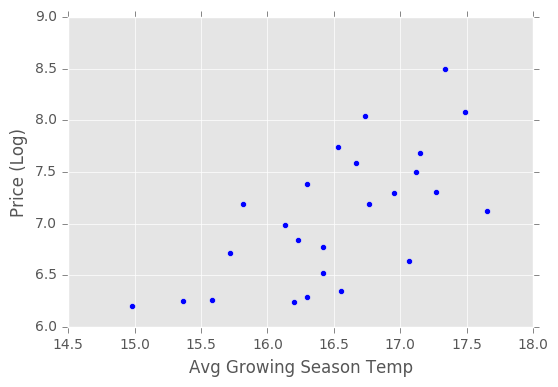

In [3]:
plt.scatter(wine.AGST, wine.Price)
plt.xlabel('Avg Growing Season Temp')
plt.ylabel('Price (Log)')

In [5]:
# Linear Regression (one variable)
model1 = ols('Price ~ AGST', wine).fit()
print(model1.summary()) 
#model1.summary()       # use without print for alternate format

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.71
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           0.000335
Time:                        17:32:34   Log-Likelihood:                -17.070
No. Observations:                  25   AIC:                             38.14
Df Residuals:                      23   BIC:                             40.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4178      2.494     -1.371      0.1

In [17]:
# Sum of Squared Errors (SSE) - Root Mean Square Error (RMSE)
SSE_m1 = np.sum((model1.resid)**2)
RSME_m1 = np.sqrt(SSE_m1 / wine.shape[0] )
print('Sum of Squared Errors (SSE) : {:.3f}'.format(SSE_m1))
print('Root Mean Square Error (RMSE) : {:.3f}'.format(RSME_m1))

Sum of Squared Errors (SSE) : 5.735
Root Mean Square Error (RMSE) : 0.479


In [74]:
# Linear Regression (two variables)
model2 = ols('Price ~ AGST + HarvestRain', wine).fit()
print model2.summary()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     26.59
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           1.35e-06
Time:                        11:32:31   Log-Likelihood:                -8.8461
No. Observations:                  25   AIC:                             23.69
Df Residuals:                      22   BIC:                             27.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -2.2027      1.854     -1.188      

In [19]:
# Sum of Squared Errors (SSE) - Root Mean Square Error (RMSE)
SSE_m2 = np.sum((model2.resid)**2)
RSME_m2 = np.sqrt(SSE_m2 / wine.shape[0] )
print('Sum of Squared Errors (SSE) : {:.3f}'.format(SSE_m2))
print('Root Mean Square Error (RMSE) : {:.3f}'.format(RSME_m2))

Sum of Squared Errors (SSE) : 2.970
Root Mean Square Error (RMSE) : 0.345


In [75]:
# Linear Regression (all variables)
model3 = ols('Price ~ AGST + HarvestRain + WinterRain + Age + FrancePop', wine).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     18.47
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           1.04e-06
Time:                        11:32:36   Log-Likelihood:                -2.1043
No. Observations:                  25   AIC:                             16.21
Df Residuals:                      19   BIC:                             23.52
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.4504     10.189     -0.044      

In [21]:
# Sum of Squared Errors (SSE) - Root Mean Square Error (RMSE)
SSE_m3 = np.sum((model3.resid)**2)
RSME_m3 = np.sqrt(SSE_m3 / wine.shape[0] )
print('Sum of Squared Errors (SSE) : {:.3f}'.format(SSE_m3))
print('Root Mean Square Error (RMSE) : {:.3f}'.format(RSME_m3))

Sum of Squared Errors (SSE) : 1.732
Root Mean Square Error (RMSE) : 0.263


In [76]:
# Remove FrancePop
model4 = ols('Price ~ AGST + HarvestRain + WinterRain + Age', wine).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     24.17
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           2.04e-07
Time:                        11:32:40   Log-Likelihood:                -2.1622
No. Observations:                  25   AIC:                             14.32
Df Residuals:                      20   BIC:                             20.42
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -3.4300      1.766     -1.942      

In [4]:
# Investigating collinearity via pairwise correlation of DataFrame columns 
wine.corr()

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,-0.447768,0.016970,-0.246916,0.028009,-1.000000,0.994485
Price,-0.447768,1.000000,0.136651,0.659563,-0.563322,0.447768,-0.466862
WinterRain,0.016970,0.136651,1.000000,-0.321091,-0.275441,-0.016970,-0.001622
AGST,-0.246916,0.659563,-0.321091,1.000000,-0.064496,0.246916,-0.259162
HarvestRain,0.028009,-0.563322,-0.275441,-0.064496,1.000000,-0.028009,0.041264
Age,-1.000000,0.447768,-0.016970,0.246916,-0.028009,1.000000,-0.994485
FrancePop,0.994485,-0.466862,-0.001622,-0.259162,0.041264,-0.994485,1.000000


In [29]:
# Investigating collinearity via pairwise correlation of DataFrame columns 
wc = wine.corr()
wc[((wc > 0.7) | ( wc <  - 0.7))]

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
Year,1.000000,NaN,NaN,NaN,NaN,-1.000000,0.994485
Price,NaN,1.0,NaN,NaN,NaN,NaN,NaN
WinterRain,NaN,NaN,1.0,NaN,NaN,NaN,NaN
AGST,NaN,NaN,NaN,1.0,NaN,NaN,NaN
HarvestRain,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,-1.000000,NaN,NaN,NaN,NaN,1.000000,-0.994485
FrancePop,0.994485,NaN,NaN,NaN,NaN,-0.994485,1.000000


In [89]:
# strong co-linearity between Age & francePop ; Remove Age and FrancePop
model5 = ols('Price ~ AGST + HarvestRain + WinterRain', wine).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     21.42
Date:                Mon, 15 Jan 2018   Prob (F-statistic):           1.36e-06
Time:                        11:41:24   Log-Likelihood:                -6.6922
No. Observations:                  25   AIC:                             21.38
Df Residuals:                      21   BIC:                             26.26
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -4.3016      2.037     -2.112      

### Using our Regression Model on new data (out-of-sample accuracy )

In [31]:
# Read in test set
wineTest = pd.read_csv("../data/wine_test.csv")
wineTest

,Year,Price,WinterRain,AGST,HarvestRain,Age,FrancePop
0,1979,6.9541,717,16.1667,122,4,54835.832
1,1980,6.4979,578,16.0000,74,3,55110.236


In [95]:
# Make test set predictions
predictTest = model4.predict(wineTest)
predictTest

array([ 6.76892463,  6.6849104 ])

In [96]:
# Compute R-squared
SSE = np.sum((wineTest.Price - predictTest)**2)
SST = np.sum((wineTest.Price - wine.Price.mean())**2)
R_squared = 1 - SSE/SST
R_squared

0.7944277602632012

In [90]:
def rSqrd(variable, trainSet, testSet, model):
    '''
     function that computes R-squared on test sets,
     and displays the difference between 
     the adjusted R-squared of the training set &
     the  R-squared of the test set.
    '''
    predictTest = model.predict(testSet)
    SSE = np.sum((testSet[variable] - predictTest)**2)
    SST = np.sum((testSet[variable] - trainSet[variable].mean())**2)
    R_squared = 1 - SSE/SST
    print('R**2 Scores : Training Set (adjusted) : {:.3f}\t|   Test Set : {:.3f}'.format( 
        model.rsquared_adj, R_squared))
    #return R_squared

In [91]:
for model in [model1, model2, model3, model4, model5]:
    rSqrd('Price', wine, wineTest, model)

R**2 Scores : Training Set (adjusted) : 0.410	|   Test Set : 0.788
R**2 Scores : Training Set (adjusted) : 0.681	|   Test Set : -0.082
R**2 Scores : Training Set (adjusted) : 0.784	|   Test Set : 0.757
R**2 Scores : Training Set (adjusted) : 0.794	|   Test Set : 0.794
R**2 Scores : Training Set (adjusted) : 0.719	|   Test Set : 0.263


#### While Model Rsquared always increases by adding more exon (dependent) variables, the same is not true for Test Rsquared. This means that out-of-sample Rsquared can be an indicator of a good model :
- __Keep adding dependent variables ; once test Rsquared starts dropping, we've gone too far.__
- __The test Rsquared can be negative ; don't freak out !!__